In [2]:
from pydeseq2.ds import DeseqStats
!pip install anndata

In [3]:
import anndata as ad
import pandas as pd

In [4]:
ppmi_ad = ad.read_h5ad("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/ppmi_adata.h5ad")

In [5]:
!pip install pydeseq2

In [6]:
adata = ppmi_ad[(ppmi_ad.obs["Gender"] == "Male") &
                (ppmi_ad.obs["Visit"] == "BL") &
                (ppmi_ad.obs["Diagnosis"].isin(["PD", "Control"]))]

In [7]:
cell_props = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/cibersortx_metadata_df.csv", index_col=0)

In [8]:
filtered_cell_meta = cell_props.loc[adata.obs["Sample"],:]

In [9]:
filtered_cell_meta.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Eosinophils,Neutrophils,P-value,Correlation,RMSE,Diagnosis,Visit,Gender,Genetic_Group,Age_Group
Mixture,,,,,,,,,,,,,,,,,,,,,
3471.BL.PP0015.6713.5104.SL.0007,0.010364,0.008340,0.0,0.000000,0.176513,0.058604,0.013397,0,0.0,0.000000,...,0.000000,0.359522,0,0.900986,0.518223,PD,BL,Male,NaN,70-80
3435.BL.PP0015.8880.5104.SL.0011,0.010684,0.002010,0.0,0.010238,0.121306,0.156061,0.009448,0,0.0,0.000000,...,0.000000,0.322555,0,0.887439,0.545949,PD,BL,Male,SRDC,50-70
3479.BL.PP0021.2283.5104.SL.0021,0.007398,0.003453,0.0,0.000000,0.143299,0.138561,0.036220,0,0.0,0.020478,...,0.005641,0.271101,0,0.860936,0.593208,Control,BL,Male,NaN,50-70
4110.BL.0003150414.5104.SL.0026,0.023685,0.000000,0.0,0.000000,0.205892,0.031398,0.009099,0,0.0,0.000000,...,0.012469,0.287567,0,0.867439,0.579053,PD,BL,Male,NaN,70-80
3174.BL.PP0015.7985.5104.SL.0027,0.002609,0.006557,0.0,0.000000,0.218058,0.128217,0.025315,0,0.0,0.000000,...,0.000000,0.269151,0,0.874726,0.579109,PD,BL,Male,SRDC,50-70


In [10]:
filtered_cell_meta = filtered_cell_meta.loc[:, filtered_cell_meta.columns.isin(["Gender", "Diagnosis", "Neutrophils", "Monocytes"])] #~filtered_cell_meta.columns.isin(["P-value", "Correlation", "RMSE", "Visit", "Gender", "Genetic_Group", "Age_Group"])]

In [11]:
filtered_cell_meta = filtered_cell_meta.loc[:, filtered_cell_meta.sum(axis=0) != 0]

In [12]:
filtered_cell_meta.columns = (filtered_cell_meta.columns
                              .str.replace(" ", "_")
                              .str.replace("-", "_")
                              .str.replace(r"\(|\)", "", regex=True))

In [13]:
design_factors = filtered_cell_meta.columns.values.tolist()

In [14]:
design_factors

['Monocytes', 'Neutrophils', 'Diagnosis', 'Gender']

In [15]:
filtered_cell_meta.head()

,Monocytes,Neutrophils,Diagnosis,Gender
Mixture,,,,
3471.BL.PP0015.6713.5104.SL.0007,0.261202,0.359522,PD,Male
3435.BL.PP0015.8880.5104.SL.0011,0.265266,0.322555,PD,Male
3479.BL.PP0021.2283.5104.SL.0021,0.272197,0.271101,Control,Male
4110.BL.0003150414.5104.SL.0026,0.275920,0.287567,PD,Male
3174.BL.PP0015.7985.5104.SL.0027,0.248029,0.269151,PD,Male


In [21]:
df = adata.to_df()
df.head()

,ENSG00000223972.5,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.5,ENSG00000284332.1,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.2,ENSG00000186092.6,ENSG00000238009.6,...,ENSG00000273739.1,ENSG00000276700.1,ENSG00000276312.1,ENSG00000275757.1,ENSG00000278573.1,ENSG00000276017.1,ENSG00000278817.1,ENSG00000277196.4,ENSG00000278625.1,ENSG00000277374.1
3471.BL.PP0015.6713.5104.SL.0007,0,97,8,0,0,0,0,0,2,124,...,0,9,0,1,0,0,7,1,0,0
3435.BL.PP0015.8880.5104.SL.0011,15,209,6,8,0,6,6,19,7,176,...,2,12,7,0,6,2,32,17,0,0
3479.BL.PP0021.2283.5104.SL.0021,3,107,3,0,0,0,0,0,0,35,...,1,0,6,0,0,0,28,0,0,0
4110.BL.0003150414.5104.SL.0026,0,90,3,0,0,0,0,0,1,75,...,0,0,3,0,0,0,8,0,0,0
3174.BL.PP0015.7985.5104.SL.0027,7,239,5,0,0,0,0,0,0,110,...,0,0,0,0,0,2,9,0,0,0


In [23]:
from pydeseq2.ds import DeseqDataSet
dds = DeseqDataSet(counts=df, metadata=filtered_cell_meta, design_factors=design_factors) #metadata=filtered_cell_meta, design_factors=design_factors, ref_level="Control")

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_29984/2293354848.py:2: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(counts=df, metadata=filtered_cell_meta, design_factors=design_factors) #metadata=filtered_cell_meta, design_factors=design_factors, ref_level="Control")


In [ ]:
dds.deseq2()

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 1.96 seconds.



In [210]:
contrast = ("Diagnosis", "PD", "Control")
deseq_stats = DeseqStats(dds, contrast=contrast)
deseq_stats.summary()
deg_results = deseq_stats.results_df
deg_results.head()

Running Wald tests...
... done in 15.23 seconds.



Log2 fold change & Wald test p-value: Diagnosis PD vs Control
         baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
0        7.767234       -0.174383  0.154397 -1.129449  0.258709  0.695065
1      101.627474       -0.187411  0.068399 -2.739979  0.006144  0.695065
2       12.701854       -0.110926  0.107244 -1.034326  0.300984  0.695065
3        2.192026       -0.205603  0.383135 -0.536634  0.591520  0.796607
4        0.000000             NaN       NaN       NaN       NaN       NaN
...           ...             ...       ...       ...       ...       ...
58775    1.384704       -0.250991  0.481830 -0.520912  0.602428  0.801864
58776    8.469801       -0.058145  0.098050 -0.593020  0.553168  0.776469
58777    2.638052       -0.239666  0.365914 -0.654979  0.512481  0.758108
58778    0.147302       -0.119328  0.684291 -0.174382  0.861566       NaN
58779    0.026067       -0.050209  2.570233 -0.019535  0.984415       NaN

[58780 rows x 6 columns]


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,7.767234,-0.174383,0.154397,-1.129449,0.258709,0.695065
1,101.627474,-0.187411,0.068399,-2.739979,0.006144,0.695065
2,12.701854,-0.110926,0.107244,-1.034326,0.300984,0.695065
3,2.192026,-0.205603,0.383135,-0.536634,0.591520,0.796607
4,0.000000,NaN,NaN,NaN,NaN,NaN


In [212]:
deg_results['abs_log2FoldChange'] = deg_results['log2FoldChange'].abs()
deg_results['padj'] = deg_results['padj'].fillna(1)
deg_results.sort_values(by=["abs_log2FoldChange", "padj"], ascending=[False, True])

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,abs_log2FoldChange
40142,0.789986,-43.280851,5.893079,-7.344353,2.067575e-13,1.000000e+00,43.280851
58737,3.360346,-5.068116,0.587630,-8.624678,6.427350e-18,1.454606e-13,5.068116
37836,55.559840,3.117541,0.358171,8.704061,3.202155e-18,1.449392e-13,3.117541
53629,42.731252,-2.424800,0.421508,-5.752682,8.783873e-09,9.939611e-05,2.424800
56851,87.686639,-2.137447,0.323361,-6.610090,3.840872e-11,5.794980e-07,2.137447
...,...,...,...,...,...,...,...
58748,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN
58749,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN
58756,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN
58759,0.000000,NaN,NaN,NaN,NaN,1.000000e+00,NaN


In [213]:
deg_results_sign = deg_results[(deg_results['abs_log2FoldChange'] >= 0.5) & (deg_results['padj'] <= 0.05)]
deg_results_sign

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,abs_log2FoldChange
575,965.811005,1.936878,0.398154,4.864649,1.146599e-06,4.716397e-03,1.936878
579,155.049616,-1.024900,0.208700,-4.910881,9.066801e-07,4.103906e-03,1.024900
2255,3.920742,-1.518943,0.272945,-5.565013,2.621336e-08,1.977492e-04,1.518943
4513,48.159412,-0.517039,0.119722,-4.318654,1.569840e-05,3.436294e-02,0.517039
6689,4.001733,-1.035273,0.246879,-4.193446,2.747487e-05,4.967038e-02,1.035273
10052,35.662450,-0.550082,0.130897,-4.202416,2.640808e-05,4.967038e-02,0.550082
10670,12.006950,-0.796735,0.188373,-4.229556,2.341532e-05,4.608033e-02,0.796735
16850,30.827558,-0.807288,0.144565,-5.584274,2.346783e-08,1.977492e-04,0.807288
24353,1.492163,-1.151838,0.271423,-4.243704,2.198599e-05,4.523417e-02,1.151838
25661,18.849441,-0.578233,0.125312,-4.614343,3.943411e-06,1.076948e-02,0.578233


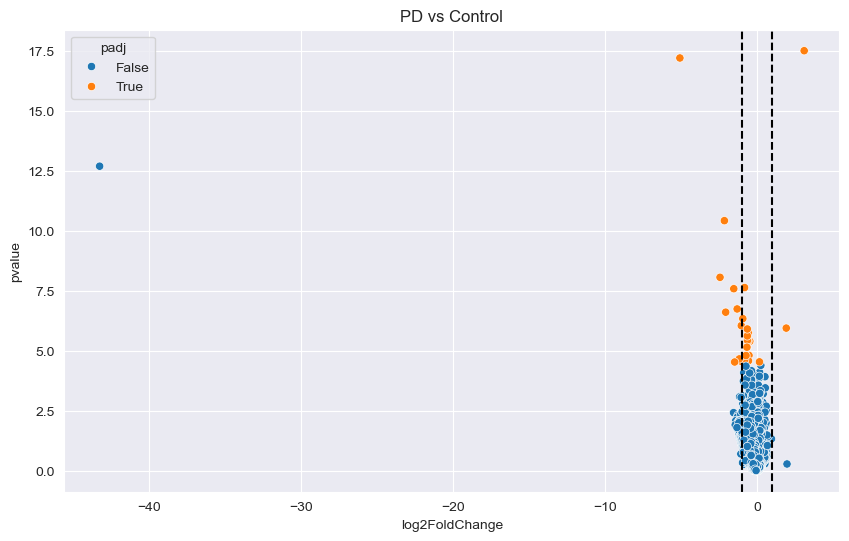

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10,6))
sns.scatterplot(x=deg_results['log2FoldChange'], y=-np.log10(deg_results['pvalue']), hue=(deg_results['padj'] <= 0.05))
plt.axvline(-1, color='k', linestyle='--')
plt.axvline(1, color='k', linestyle='--')
plt.title("PD vs Control")
plt.show()